In [ ]:
# !pip install ipycanvas
# !jupyter nbextension enable --py widgetsnbextension


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# Load and preprocess the MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the input images to [0, 1] and flatten to 784-dim vector
x_train = x_train.reshape(-1, 28 * 28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28 * 28).astype("float32") / 255.0


# Convert labels to one-hot encoding (optional for sparse_categorical_crossentropy)
# y_train = to_categorical(y_train, 10)
# y_test = to_categorical(y_test, 10)



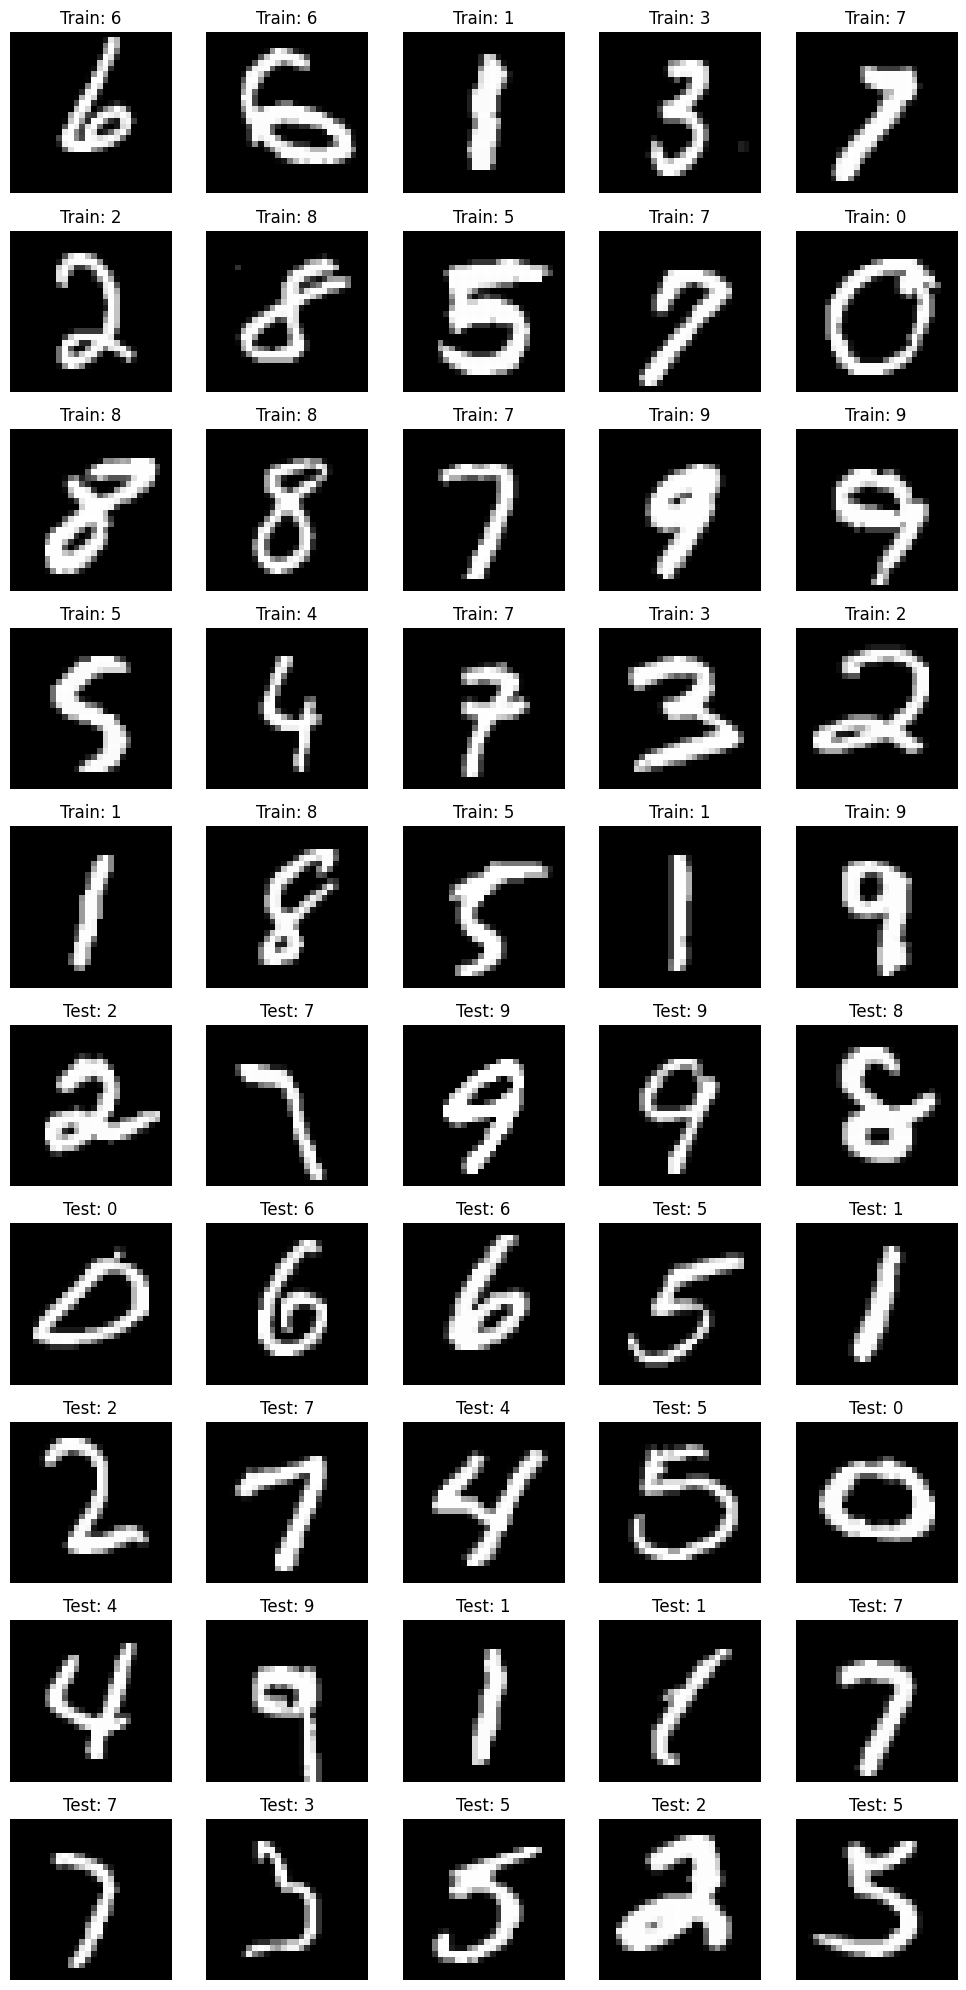

In [ ]:
# Randomly select 25 training and 25 test images
num_samples = 25
train_indices = np.random.choice(x_train.shape[0], num_samples, replace=False)
test_indices = np.random.choice(x_test.shape[0], num_samples, replace=False)

train_images = x_train[train_indices].reshape(-1, 28, 28)
train_labels = y_train[train_indices]

test_images = x_test[test_indices].reshape(-1, 28, 28)
test_labels = y_test[test_indices]

# Plotting 10x10 grid: 5x5 training (top), 5x5 test (bottom)
fig, axs = plt.subplots(10, 5, figsize=(10, 20))

for i in range(5):
    for j in range(5):
        idx = i * 5 + j
        axs[i, j].imshow(train_images[idx], cmap='gray')
        axs[i, j].set_title(f"Train: {train_labels[idx]}")
        axs[i, j].axis('off')

        axs[i + 5, j].imshow(test_images[idx], cmap='gray')
        axs[i + 5, j].set_title(f"Test: {test_labels[idx]}")
        axs[i + 5, j].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Build MLP model
model = models.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # No activation since we'll use sparse_categorical_crossentropy
])



In [ ]:
# Compile the model
model.compile(
    optimizer='sgd',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)



In [ ]:
# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.1)



Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8414 - loss: 0.5358 - val_accuracy: 0.9670 - val_loss: 0.1183
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9612 - loss: 0.1313 - val_accuracy: 0.9702 - val_loss: 0.0993
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9746 - loss: 0.0839 - val_accuracy: 0.9748 - val_loss: 0.0815
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9805 - loss: 0.0640 - val_accuracy: 0.9765 - val_loss: 0.0899
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9854 - loss: 0.0457 - val_accuracy: 0.9750 - val_loss: 0.0864
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9886 - loss: 0.0361 - val_accuracy: 0.9780 - val_loss: 0.0841
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9902 - loss: 0.0297 - val_accuracy: 0.9742 - val_loss: 0.0971
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9925 - loss: 0.0244 - val_accuracy: 0.

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc * 100:.2f}%")


Test accuracy: 97.69%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


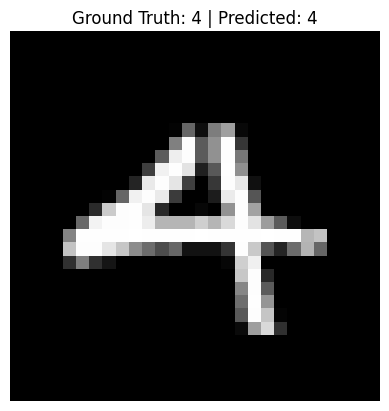

In [ ]:
import random

# Pick a random test sample
index = random.randint(0, x_test.shape[0] - 1)
sample_image = x_test[index].reshape(1, 784)  # Flatten for model input
ground_truth = y_test[index]

# Predict the label
logits = model.predict(sample_image)
predicted_label = np.argmax(logits)

# Reshape back to 28x28 for visualization
plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.title(f"Ground Truth: {ground_truth} | Predicted: {predicted_label}")
plt.axis('off')
plt.show()
